In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np

import sympy as sp
import re

sys.path.append("../run/")
import BondGraph as bg


Example 1: 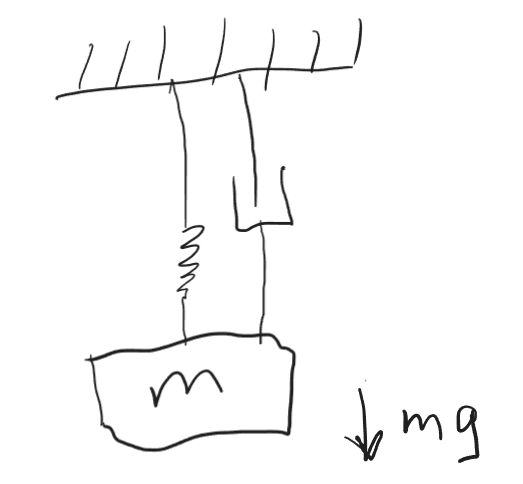

In [2]:
# Create empty model
model = bg.BondGraph(Name ='My Bond graph model')

In [3]:
#Create some elements
SE_1 = bg.BGelement('SE')
SF_1 = bg.BGelement('SF', Position=[2,1])
C_1 = bg.BGelement('C', Position=[3,6])
R_1 = bg.BGelement('R', Position=[3,4])
I_1 = bg.BGelement('I', Position=[0,3])
OneJ_1 = bg.BGelement('1', Position=[0,1])
OneJ_2 = bg.BGelement('1', Position=[1,1])
OneJ_3 = bg.BGelement('1', Position=[2,0])
ZeroJ_1 = bg.BGelement('0', Position=[1,0])
# print(C)

In [4]:
# Add the created elements to the model
model.addElement(OneJ_1)
model.addElement(OneJ_2)
model.addElement(OneJ_3)
model.addElement(ZeroJ_1)
model.addElement(C_1)
model.addElement(R_1)

model.addElement(I_1)
model.addElement(SE_1)
model.addElement(SF_1)
# print(model)

In [5]:
# add a connections between elements in model
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(OneJ_1, ZeroJ_1)
model.connect(ZeroJ_1, OneJ_2)
model.connect(ZeroJ_1, OneJ_3)
model.connect(C_1, OneJ_2)
model.connect(R_1, OneJ_2)
model.connect(OneJ_3, SF_1)

In [6]:
model.applyRules()

NB! None val
NB! None val
NB! None val
NB! None val


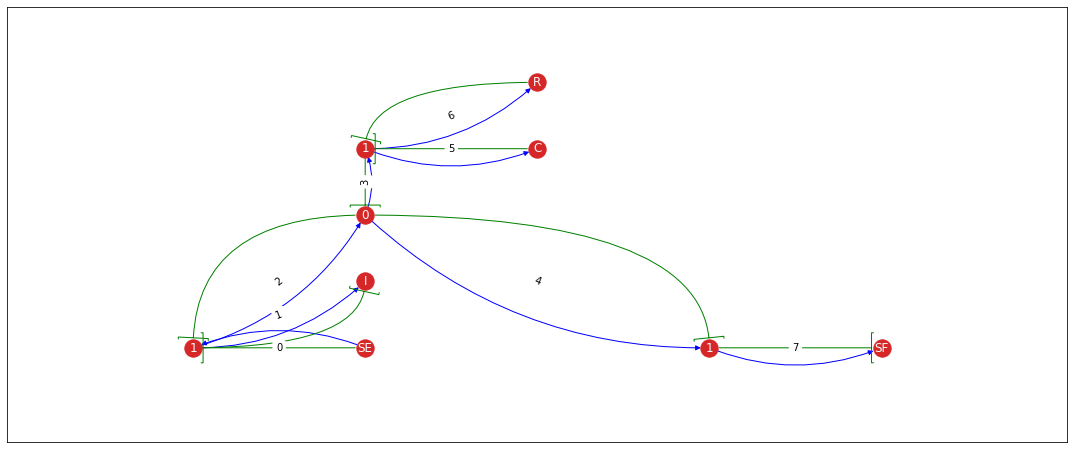

In [7]:
# Set positions automatically for drawing
# some automatically done works on model
model.render()
model.draw()

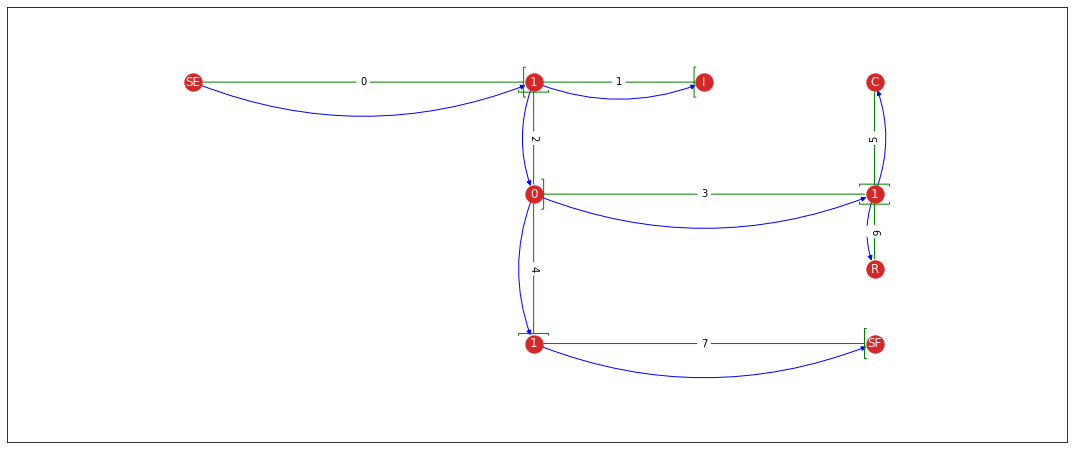

In [8]:
# set positions manually
SE_1.setPosition([0,7])
OneJ_1.setPosition([2,7])
OneJ_2.setPosition([4,4])
OneJ_3.setPosition([2,0])
ZeroJ_1.setPosition([2,4])
I_1.setPosition([3,7])
C_1.setPosition([4,7])
R_1.setPosition([4,2])
SF_1.setPosition([4,0])

# draw
model.draw()

In [9]:
model.show_ports_state()

Element name:  1_5
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 4 |  arrow:  Output |  causality:  Causal
Element name:  1_6
++ port_id: 7 |  arrow:  Input |  causality:  Uncausal
++ port_id: 11 |  arrow:  Output |  causality:  Causal
++ port_id: 13 |  arrow:  Output |  causality:  Causal
Element name:  1_7
++ port_id: 9 |  arrow:  Input |  causality:  Causal
++ port_id: 14 |  arrow:  Output |  causality:  Uncausal
Element name:  0_8
++ port_id: 5 |  arrow:  Input |  causality:  Uncausal
++ port_id: 6 |  arrow:  Output |  causality:  Causal
++ port_id: 8 |  arrow:  Output |  causality:  Uncausal
Element name:  C_2
++ port_id: 10 |  arrow:  Input |  causality:  Uncausal
Element name:  R_3
++ port_id: 12 |  arrow:  Input |  causality:  Uncausal
Element name:  I_4
++ port_id: 2 |  arrow:  Input |  causality:  Causal
Element name:  SE_0
++ port_id: 0 |  arrow:  Output |  causality:  Uncausal
Element name:  SF_1
++ 

## assign_equations SEQ


In [10]:
model.assign_equations()
equastions = model.get_model_equations()


assign_bonds...
both elements found... 0 5 SE 1 -----------------------
both elements found... 5 4 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 5 8 1 0 -----------------------
both elements found... 8 6 0 1 -----------------------
Express: not found the variable, inverse variable check
both elements found... 8 7 0 1 -----------------------
both elements found... 6 2 1 C -----------------------
both elements found... 6 3 1 R -----------------------
both elements found... 7 1 1 SF -----------------------
Express: not found the variable, inverse variable check
assign_bonds...
both elements found... 0 5 SE 1 -----------------------
both elements found... 5 4 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 5 8 1 0 -----------------------
both elements found... 8 6 0 1 -----------------------
Express: not found the variable, inverse variable check
both elements found... 8 

In [11]:
equastions

['+e0=+SE0',
 '+f0=+f1=+f2',
 '+e1=+e0-e2',
 '+f1=+1/I4*p4',
 '+e2=+e3=+e4',
 '+f0=+f1=+f2',
 '+e3=+e5+e6',
 '+f3=+f2-f4',
 '+e4=+e7',
 '+f4=+f7',
 '+e5=+1/C2*q2',
 '+f3=+f5=+f6',
 '+e6=+R3*f6',
 '+f3=+f5=+f6',
 '+e7=+e4',
 '+f7=+SF1']

In [12]:

equastions_eq_zero = model.express_eq_as_zero(equastions)
equastions_eq_zero

['-e0+SE0',
 '-f0+f1',
 '-f0+f2',
 '-e1+e0-e2',
 '-f1+1/I4*p4',
 '-e2+e3',
 '-e2+e4',
 '-f0+f1',
 '-f0+f2',
 '-e3+e5+e6',
 '-f3+f2-f4',
 '-e4+e7',
 '-f4+f7',
 '-e5+1/C2*q2',
 '-f3+f5',
 '-f3+f6',
 '-e6+R3*f6',
 '-f3+f5',
 '-f3+f6',
 '-e7+e4',
 '-f7+SF1']

## State-space form sequence

In [13]:
cauchy_state_equastions, variables_exp  = model.cauchy_form_equastions_sequence()

assign_bonds...
both elements found... 0 5 SE 1 -----------------------
both elements found... 5 4 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 5 8 1 0 -----------------------
both elements found... 8 6 0 1 -----------------------
Express: not found the variable, inverse variable check
both elements found... 8 7 0 1 -----------------------
both elements found... 6 2 1 C -----------------------
both elements found... 6 3 1 R -----------------------
both elements found... 7 1 1 SF -----------------------
Express: not found the variable, inverse variable check
assign_bonds...
both elements found... 0 5 SE 1 -----------------------
both elements found... 5 4 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 5 8 1 0 -----------------------
both elements found... 8 6 0 1 -----------------------
Express: not found the variable, inverse variable check
both elements found... 8 

In [14]:
model.final_variables


[SE0, SF1, q2, p4, C2, R3, I4]

In [15]:
cauchy_state_equastions

{'dq2/dt': -SF1 + p4/I4, 'dp4/dt': R3*SF1 + SE0 - R3*p4/I4 - q2/C2}

In [16]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print(cauchy_state_equastions, model.state_variables)

############## STATE EQUASIONS ############
dq2/dt = -SF1 + p4/I4
dp4/dt = R3*SF1 + SE0 - R3*p4/I4 - q2/C2
####################################################
{'dq2/dt': -SF1 + p4/I4, 'dp4/dt': R3*SF1 + SE0 - R3*p4/I4 - q2/C2} [q2, p4]


In [17]:
print('effort-flow list: ', model.eff_flows_sp, '\nvariables list: ', model.final_variables, '\n ', model.state_variables, model.input_variables)

effort-flow list:  [f3, e1, f7, e6, f1, f4, e4, f5, e0, e2, f6, f2, e3, f0, e5, e7] 
variables list:  [SE0, SF1, q2, p4, C2, R3, I4] 
  [q2, p4] [SE0, SF1]


In [18]:
variables_exp

{f3: [f2 - f4],
 e1: [e0 - e2],
 f7: [SF1],
 e6: [R3*f6],
 f1: [p4/I4],
 f4: [f7],
 e4: [e2],
 f5: [f3],
 e0: [SE0],
 e2: [e3],
 f6: [f3],
 f2: [f0],
 e3: [e5 + e6],
 f0: [f1],
 e5: [q2/C2],
 e7: [e4]}

## Make state-space eq in matrix from

In [19]:
cauchy_state_equastions

{'dq2/dt': -SF1 + p4/I4, 'dp4/dt': R3*SF1 + SE0 - R3*p4/I4 - q2/C2}

In [20]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.A} \n Matrix B: {model.B}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

(-1, SF1) --------------
(p4, 1/I4) --------------
() --------------
(R3, SF1) --------------
(-1, q2, 1/C2) --------------
(-1, R3, p4, 1/I4) --------------
Matrix([[0, 1/I4], [-1/C2, -R3/I4]])
(-1, SF1) --------------
(p4, 1/I4) --------------
() --------------
(R3, SF1) --------------
(-1, q2, 1/C2) --------------
(-1, R3, p4, 1/I4) --------------
Matrix([[0, -1], [1, R3]])
Matrix A: Matrix([[0, 1/I4], [-1/C2, -R3/I4]]) 
 Matrix B: Matrix([[0, -1], [1, R3]])
 input_variables: [SE0, SF1] 
 state_variables: [q2, p4]


In [21]:
model.A

Matrix([
[    0,   1/I4],
[-1/C2, -R3/I4]])

In [22]:
model.B

Matrix([
[0, -1],
[1, R3]])

B_matrix = model.make_matrix_from_cauchy(B_matrix, cauchy_state_equastions, model.input_variables)
B_matrix

## Make С-В-matrix
Now we can set the input variables and get С-В-matrix

In [23]:
# Enter for example f5, e5
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp)

Input the names of output variables:
It mast be in list eff_flows:  [e7, e5, e4, e2, f7, f3, f0, f1, e3, f5, e1, e0, f2, e6, f6, f4] (Velocity of Force at some point)
U entered this:  ['f5', ' e5']
output variable=  f5
first match [f3]
next iteration with expression: f2 - f4
next iteration with expression: f0 - f7
next iteration with expression: -SF1 + f1
next iteration with expression: -SF1 + p4/I4
output variable=  e5
first match [q2/C2]


In [24]:
cauchy_form_output_eq 

{f5: -SF1 + p4/I4, e5: q2/C2}

In [25]:
model.make_output_statespace(cauchy_form_output_eq)
print(model.C, model.D)

(-1, SF1) --------------
(p4, 1/I4) --------------
Matrix([[0, 1/I4], [1/C2, 0]])
(-1, SF1) --------------
(p4, 1/I4) --------------
Matrix([[0, -1], [0, 0]])
Matrix([[0, 1/I4], [1/C2, 0]]) Matrix([[0, -1], [0, 0]])


In [26]:
model.C

Matrix([
[   0, 1/I4],
[1/C2,    0]])

In [27]:
model.D

Matrix([
[0, -1],
[0,  0]])

## Make numerical matrixes from symbolic

In [28]:
print('List of system parameters:', model.parameter_variables)
parameters_list = model.parameter_variables

parameters_values = [1, 1, 1]

List of system parameters: [C2, R3, I4]


In [29]:
model.input_variables

[SE0, SF1]

In [30]:

initial_state = np.zeros((len(model.state_variables),1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps=500
sampling_period=0.05
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 0] = 1

initial_state:  [[0.]
 [0.]]


In [31]:
# state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)

parameters_list = model.parameter_variables 
# make numerical materix frim symbolic
A = np.array(model.A.subs({parameters_list[i]:parameters_values[i] for i in range(len(parameters_list))})).astype(np.float64)
B = np.array(model.B.subs({parameters_list[i]:parameters_values[i] for i in range(len(parameters_list))})).astype(np.float64)
C = np.array(model.C.subs({parameters_list[i]:parameters_values[i] for i in range(len(parameters_list))})).astype(np.float64)
D = np.array(model.D.subs({parameters_list[i]:parameters_values[i] for i in range(len(parameters_list))})).astype(np.float64)

I = np.identity(A.shape[0]) # this is an identity matrix
Ad = np.linalg.inv(I - sampling_period * A)
Bd = Ad.dot(sampling_period * B)
#     print("Bd.shape", Bd.shape)
Xd = np.zeros(shape=(A.shape[0], time_steps + 1))
Yd = np.zeros(shape=(C.shape[0], time_steps + 1))
for i in range(0, time_steps):
#         print('i=', i)
    if i == 0:
        Xd[:,[i]] = initial_state
#             print((C@initial_state.reshape(len(state_variables), 1)).shape)
        Yd[:,[i]] = C@initial_state + D@input_sequence[i].reshape(len(model.input_variables),1)
#             print((Ad@initial_state).shape, (input_sequence[i]).shape)
        x = Ad@initial_state + Bd@input_sequence[i].reshape(len(model.input_variables),1)
#             print(x.shape)
    else:

        Xd[:,[i]] = x
        Yd[:,[i]] = C@x + D@input_sequence[i].reshape(len(model.input_variables),1)
        x = Ad@x + Bd@input_sequence[i].reshape(len(model.input_variables), 1)
Xd[:,[-1]] = x
Yd[:,[-1]] = C@x + D@input_sequence[i].reshape(len(model.input_variables),1)
#TODO Using D matrix
state, output = Xd, Yd

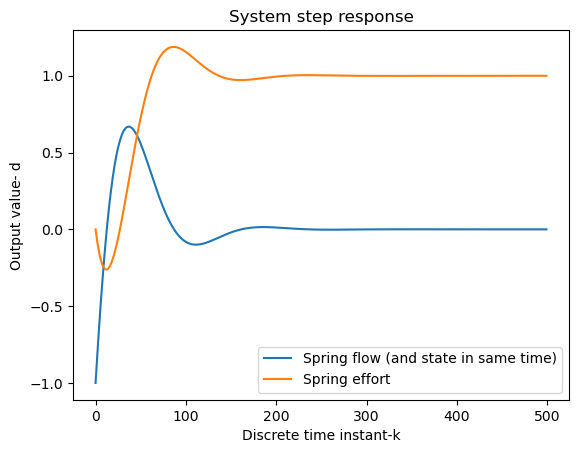

In [32]:
plt.plot(output[0,:-1], label='Spring flow (and state in same time)')
plt.plot(output[1,:-1], label='Spring effort')
plt.xlabel('Discrete time instant-k')
plt.ylabel('Output value- d')
plt.title('System step response')
plt.legend()

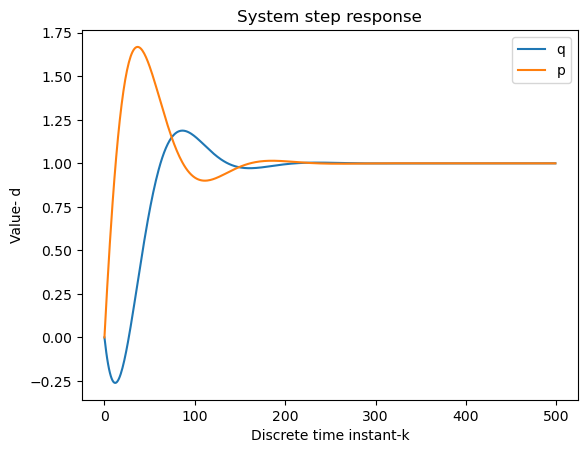

In [33]:
plt.plot(state[0,:-1], label='q')
plt.plot(state[1,:-1], label='p')
plt.xlabel('Discrete time instant-k')
plt.ylabel('Value- d')
plt.title('System step response')
plt.legend()

AS WE CAN SEE MASS_SPRING SYSTEM BECAME STABLE OVER TIME